<a href="https://colab.research.google.com/github/adeeeeelahmed/Codexcue/blob/main/Spam_Email_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Libraries:

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

Loading the Dataset:

In [26]:
data = pd.read_csv('emails.csv')

Handling missing values:

In [27]:
if 'Email No.' in data.columns:
    data.drop(columns=['Email No.'], inplace=True)

if data.isnull().sum().sum() > 0:
    data.fillna(data.mean(), inplace=True)

if 'Prediction' not in data.columns:
    raise ValueError("'Prediction' column is missing from the dataset")

X = data.drop(columns=['Prediction'])
y = data['Prediction']

X = X.apply(pd.to_numeric, errors='coerce')
y = pd.to_numeric(y, errors='coerce')

X.fillna(X.mean(), inplace=True)

Model Training and Evaluation:

In [28]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [29]:
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

y_pred = svm_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("SVM Model Performance:")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")

SVM Model Performance:
Accuracy: 0.9449275362318841
Precision: 0.9288287038694205
Recall: 0.9381445891087299
F1-Score: 0.9333089155449744


Confusion Matrix and Visualization:


Confusion Matrix:
[[705  34]
 [ 23 273]]


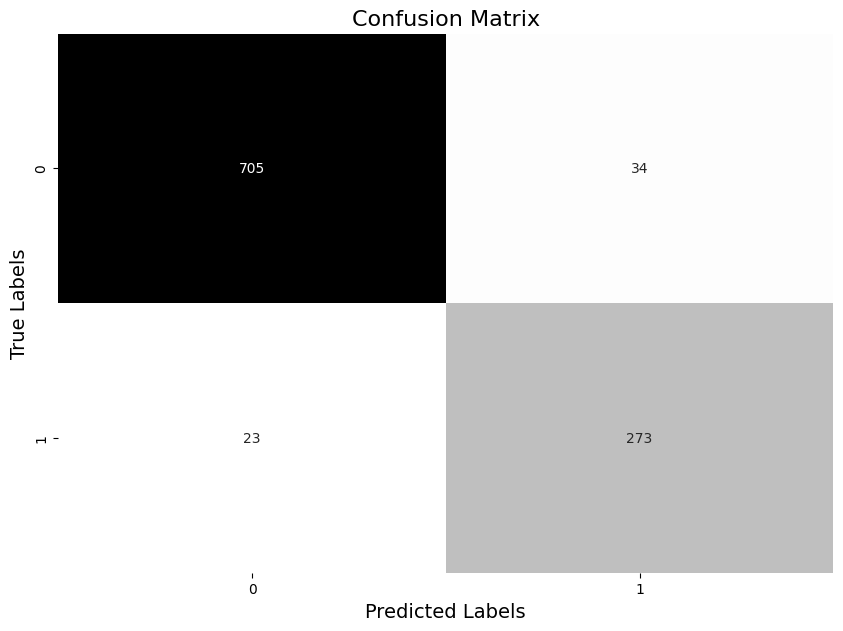

In [30]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greys', cbar=False)
plt.title('Confusion Matrix', fontsize=16)
plt.xlabel('Predicted Labels', fontsize=14)
plt.ylabel('True Labels', fontsize=14)
plt.show()

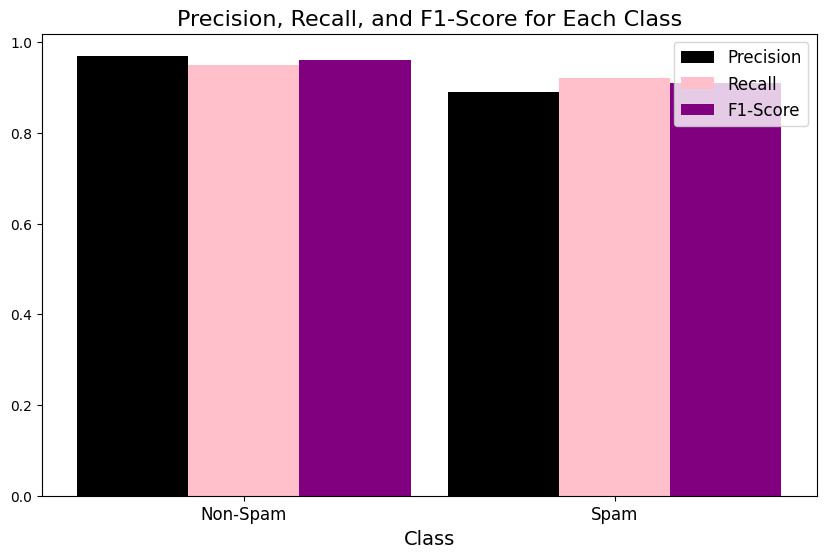

In [31]:
metrics = {
    'Non-Spam': {'Precision': 0.97, 'Recall': 0.95, 'F1-Score': 0.96},
    'Spam': {'Precision': 0.89, 'Recall': 0.92, 'F1-Score': 0.91}
}

fig, ax = plt.subplots(figsize=(10, 6))
classes = list(metrics.keys())
metrics_names = list(next(iter(metrics.values())).keys())
colors = ['black', 'pink', 'purple']

for i, metric in enumerate(metrics_names):
    values = [metrics[cls][metric] for cls in classes]
    ax.bar(np.arange(len(classes)) + i * 0.3, values, width=0.3, label=metric, color=colors[i])

ax.set_xticks(np.arange(len(classes)) + 0.3)
ax.set_xticklabels(classes, fontsize=12)
ax.set_xlabel('Class', fontsize=14)
ax.set_title('Precision, Recall, and F1-Score for Each Class', fontsize=16)
ax.legend(fontsize=12)
plt.show()